# **2023 강서구 빅데이터 활용 공모전**

https://www.gangseo.seoul.kr/reserve/re040101/view?aplySn=44&curPage=1


## **01. 라이브러리 및 데이터 불러오기**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font',family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# working directory를 설정함.
import os
os.chdir("/content/drive/MyDrive/ESAA/강서구 공모전")

In [ ]:
df = pd.read_csv("gs_dataset4.csv", index_col=0)

In [ ]:
df

,노인부양인구비율,노인빈곤율,고령인구비율,독거노인가구비율,노인복지율
id,,,,,
염창동,14.265414,2.014942,10.576094,3.856766,0.000000
등촌1동,14.926819,3.348138,11.978229,5.573529,0.068329
등촌2동,20.905809,4.678179,15.595162,6.114444,0.062794
등촌3동,31.634183,40.373223,21.983460,17.958966,0.222156
화곡본동,21.034431,7.219442,24.251705,7.019170,0.107219
화곡2동,21.682652,10.484152,15.865385,8.232564,0.034831
화곡3동,26.327989,6.456346,18.877245,8.087398,0.024456
화곡4동,25.483807,11.612735,18.405379,9.263439,0.000000
화곡6동,18.646072,7.997546,19.481192,7.285873,0.061362


## **02. 데이터 EDA**

### **경제 지표**

Text(0.5, 0, '행정동')

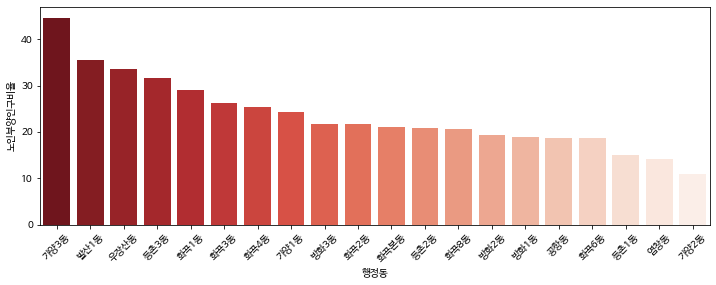

In [ ]:
#노인부양인구비율
plt.figure(figsize=(12,4))
sns.barplot(data=df, x=df.index, y='노인부양인구비율', palette='Reds_r',order=df.sort_values('노인부양인구비율',ascending=False).index)
plt.xticks(rotation=45)
plt.xlabel('행정동')

Text(0.5, 0, '행정동')

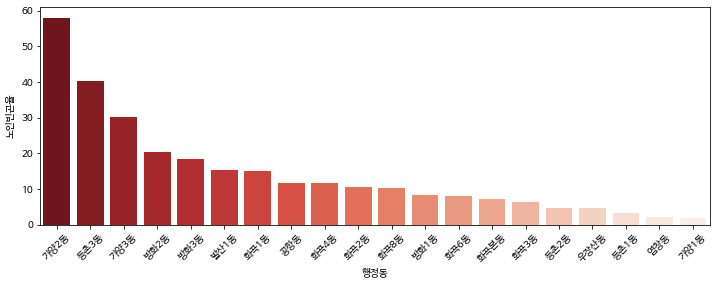

In [ ]:
#노인빈곤율
plt.figure(figsize=(12,4))
sns.barplot(data=df, x=df.index, y='노인빈곤율', palette='Reds_r',order=df.sort_values('노인빈곤율',ascending=False).index)
plt.xticks(rotation=45)
plt.xlabel('행정동')

###**고령 지표**

Text(0.5, 0, '행정동')

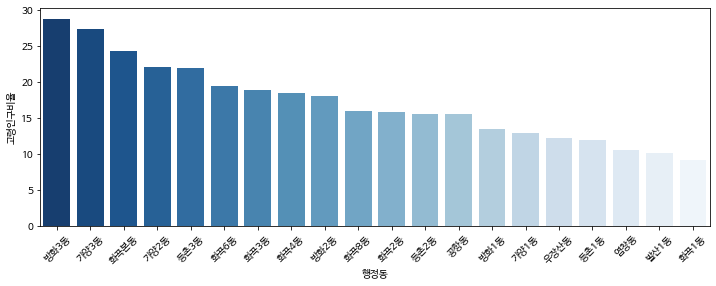

In [ ]:
#고령인구비율
plt.figure(figsize=(12,4))
sns.barplot(data=df, x=df.index, y='고령인구비율', palette='Blues_r',order=df.sort_values('고령인구비율',ascending=False).index)
plt.xticks(rotation=45)
plt.xlabel('행정동')

###**가족 지표**

Text(0.5, 0, '행정동')

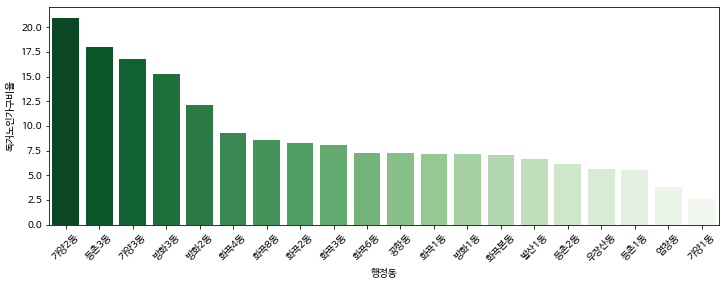

In [ ]:
#독거노인가구비율
plt.figure(figsize=(12,4))
sns.barplot(data=df, x=df.index, y='독거노인가구비율', palette='Greens_r',order=df.sort_values('독거노인가구비율',ascending=False).index)
plt.xticks(rotation=45)
plt.xlabel('행정동')

###**복지 지표**

Text(0.5, 0, '행정동')

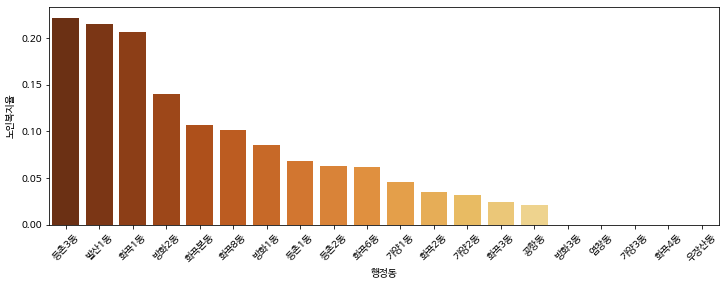

In [ ]:
#노인복지율
plt.figure(figsize=(12,4))
sns.barplot(data=df, x=df.index, y='노인복지율', palette='YlOrBr_r',order=df.sort_values('노인복지율',ascending=False).index)
plt.xticks(rotation=45)
plt.xlabel('행정동')

## **03. 피처 엔지니어링**

### **1) 스케일링**

In [ ]:
from sklearn.preprocessing import StandardScaler
df_ss1 = StandardScaler().fit_transform(df)
df_ss = pd.DataFrame(df_ss1, columns = df.columns)
df_ss
df_ss.index = df.index

### **2) 차원 축소 (PCA)**

#### **(1) 주성분 개수 구하기**

In [ ]:
# 상관행렬 이용하기 위해 스케일링
from sklearn.preprocessing import StandardScaler
std_df = StandardScaler().fit_transform(df_ss)
std_df = pd.DataFrame(std_df, index = df_ss.index, columns=df_ss.columns)

# 모든 독립변수개수만큼 주성분 개수 설정해서 분석
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_array = pca.fit_transform(std_df)
pca_df = pd.DataFrame(pca_array, index=std_df.index, columns=[f"pca{num+1}" for num in range(std_df.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5
id,,,,,
염창동,-2.021658,-1.119824,-0.539787,-0.528194,-0.008477
등촌1동,-1.568184,-0.395916,-0.831634,-0.002234,-0.175910
등촌2동,-1.003742,-0.266127,-0.036991,0.226124,-0.013810
등촌3동,2.899924,2.118973,-0.476141,0.313116,-0.062588
화곡본동,0.050811,-0.243682,0.089327,1.534762,0.347325


In [ ]:
# 주성분 설명력과 기여율
result = pd.DataFrame({'고윳값':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f"pca{num+1}" for num in range(std_df.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,고윳값,기여율,누적기여율
pca1,2.613276,0.496522,0.496522
pca2,1.331440,0.252974,0.749496
pca3,0.943646,0.179293,0.928789
pca4,0.349027,0.066315,0.995104
pca5,0.025769,0.004896,1.000000


* 주성분의 개수 정하는 기준 (OR)
  1. 고윳값이 0.7이상인 주성분
  2. 누적기여율이 0.8 이상이 넘어가지는 지점의 주성분
  3. Scree Plot에서 완만해지는 지점

* 누적기여율이 0.8이상 넘어가는 지점 = 2

#### **(2) PCA 처리**

In [ ]:
# 이제 PCA 변환
from sklearn.decomposition import PCA

pca=PCA(n_components=2) #PCA로 변환할 차원의 수를 의미.

#fit과 transform 호출해 PCA 변환 데이터 반환
pca.fit(std_df)
df_ss_pca=pca.transform(std_df)
print(df_ss_pca.shape)

(20, 2)


In [ ]:
# PCA 변환된 데이터의 칼럼 명을 지정.
pca_columns=['pca_1','pca_2']
df_ss_pca1=pd.DataFrame(df_ss_pca, columns=pca_columns)
df_ss_pca1.head(3)

,pca_1,pca_2
0,-2.021658,-1.119824
1,-1.568184,-0.395916
2,-1.003742,-0.266127


In [ ]:
# pca component 별로 원본 데이터의 변동성을 얼마나 잘 반영하고 있는지
print(pca.explained_variance_ratio_)

[0.49652248 0.25297364]


## **03. 군집분석**


### **1) 최적 군집개수 결정**

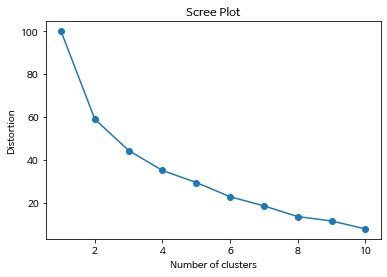

In [ ]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_ss)
    distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음

# plot - 급격하게 줄어드는 부분
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### **2) 분류타깃 결정**

In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(df_ss)
#fit 수행하여 irisDF 데이터에 대한 군집화 수행 결과가 kmeans 객체 변수로 변환

#kmeans의 labels_속성값 통해 irisDF의 각 데이터가 어떤 중심에 속하는지를 알 수 있다
print(kmeans.labels_)

[0 0 0 2 0 0 0 0 0 0 0 3 1 2 0 0 0 1 2 0]


In [ ]:
df.index

In [ ]:
arr1 = np.array(df.index).reshape(20,1)
arr2 = kmeans.labels_.reshape(20,1)
arr = np.concatenate((arr1, arr2), axis=1)
arr

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(df_ss)

df_ss_pca_with = df_ss.copy()
df_ss_pca_with['pca_1']=pca_transformed[:,0]
df_ss_pca_with['pca_2']=pca_transformed[:,1]
df_ss_pca_with['cluster'] = kmeans.labels_
df_ss_pca_with

### **3) 군집분석 시각화1**

In [ ]:
#군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind=df_ss_pca_with[df_ss_pca_with['cluster']==0].index
marker1_ind=df_ss_pca_with[df_ss_pca_with['cluster']==1].index
marker2_ind=df_ss_pca_with[df_ss_pca_with['cluster']==2].index
marker3_ind=df_ss_pca_with[df_ss_pca_with['cluster']==3].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y 값 추출.o,s,^로 마커 표시
plt.scatter(x=df_ss_pca_with.loc[marker0_ind,'pca_1'],y=df_ss_pca_with.loc[marker0_ind,'pca_2'],marker='o')
plt.scatter(x=df_ss_pca_with.loc[marker1_ind,'pca_1'],y=df_ss_pca_with.loc[marker1_ind,'pca_2'],marker='s')
plt.scatter(x=df_ss_pca_with.loc[marker2_ind,'pca_1'],y=df_ss_pca_with.loc[marker2_ind,'pca_2'],marker='*')
plt.scatter(x=df_ss_pca_with.loc[marker3_ind,'pca_1'],y=df_ss_pca_with.loc[marker3_ind,'pca_2'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA components')
plt.legend(('제1그룹','제2그룹', '제3그룹', '제4그룹'),loc='upper right', bbox_to_anchor=(1.25, 1.0))
plt.show()

### **3) 군집분석 시각화2**


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_ss1 = ss.fit_transform(train_un)

pca_3=PCA(n_components=3)
df_ss_pca_3=pca_3.fit_transform(df_ss1) #B

In [ ]:
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#표준화
scaler = StandardScaler()
W = scaler.fit_transform(df)
print("\n Standardized Data: \n", W)
#projection, pca 매트릭스 만들기
pca_w = PCA()
pca_w.fit(W)
print("\n Eigenvectors: \n", pca_w.components_)
print("\n Eigenvalues: \n",pca_w.explained_variance_)
B = pca_w.transform(W)
print("\n Projected Data: \n", B)


 Standardized Data: 
 [[-1.19005854 -0.90708963 -1.19980812 -1.11397046 -0.99599897]
 [-1.10598388 -0.80965731 -0.94282659 -0.75430091 -0.04334008]
 [-0.34596396 -0.71245555 -0.27991939 -0.6409769  -0.12050992]
 [ 1.01777445  1.89620176  0.89092014  1.84050338  2.10134174]
 [-0.32961417 -0.5267355   1.30664121 -0.45143285  0.49887198]
 [-0.24721543 -0.28814472 -0.23039338 -0.19722133 -0.51037853]
 [ 0.34327706 -0.58250392  0.32161672 -0.22763427 -0.65503142]
 [ 0.2359687  -0.20566587  0.2351338   0.01875155 -0.99599897]
 [-0.63321071 -0.46987034  0.43230747 -0.39555724 -0.14047659]
 [-0.38110578 -0.30126899 -0.22512192 -0.12911569  0.41944906]
 [ 0.09406586 -0.91185975 -0.78771599 -1.37210239 -0.36384468]
 [-1.62054364  3.18918872  0.90436966  2.47358211 -0.54798602]
 [ 2.67807496  1.14535801  1.8657238   1.59847947 -0.99599897]
 [ 1.5182422   0.07120079 -1.27692894 -0.53058137  2.00715946]
 [-0.62919609 -0.19500065 -0.3013571  -0.40288314 -0.70988851]
 [-0.60500987 -0.45412027 -0.667

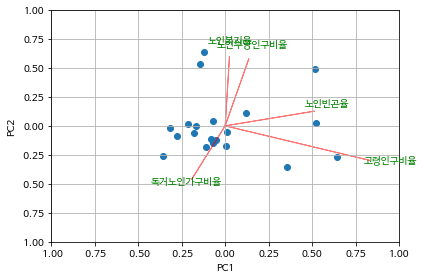

In [ ]:
def biplot(score,coeff,pcax,pcay,labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)

  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='right', va='right')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='bottom')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.tight_layout()
  plt.grid()
biplot(B, pca_w.components_,  1, 2,  labels=df.columns)

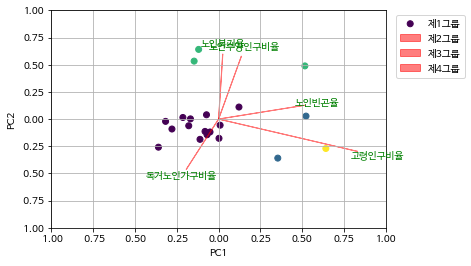

In [ ]:
def biplot_both(score,coeff,pcax,pcay,labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())

  kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,random_state=0)
  kmeans.fit(score)

  plt.scatter(xs*scalex,ys*scaley, c=kmeans.labels_)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)

  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.legend(('제1그룹','제2그룹', '제3그룹', '제4그룹'),loc='upper right', bbox_to_anchor=(1.25, 1.0))
  plt.grid()

biplot_both(B, pca_w.components_,  1, 2,  labels=df.columns)

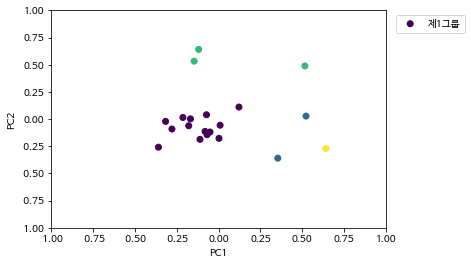

In [ ]:
def biplot_both(score,coeff,pcax,pcay,labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())

  kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,random_state=0)
  kmeans.fit(score)

  plt.scatter(xs*scalex,ys*scaley, c=kmeans.labels_)

  plt.xlim(-1,1)
  plt.ylim(-1,1)

  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.legend(('제1그룹','제2그룹', '제3그룹', '제4그룹'),loc='upper right', bbox_to_anchor=(1.25, 1.0))


biplot_both(B, pca_w.components_,  1, 2,  labels=df.columns)

## **04. 강서구 내 지역별 시각화**

###**1) 레이더 차트**

In [ ]:
from sklearn.preprocessing import StandardScaler
df_ss1 = StandardScaler().fit_transform(df)
df_ss = pd.DataFrame(df_ss1, columns = df.columns)
df_ss

,노인부양인구비율,노인빈곤율,고령인구비율,독거노인가구비율,노인복지율
0,-1.190059,-0.907090,-1.199808,-1.113970,-0.995999
1,-1.105984,-0.809657,-0.942827,-0.754301,-0.043340
2,-0.345964,-0.712456,-0.279919,-0.640977,-0.120510
3,1.017774,1.896202,0.890920,1.840503,2.101342
4,-0.329614,-0.526735,1.306641,-0.451433,0.498872
5,-0.247215,-0.288145,-0.230393,-0.197221,-0.510379
6,0.343277,-0.582504,0.321617,-0.227634,-0.655031
7,0.235969,-0.205666,0.235134,0.018752,-0.995999
8,-0.633211,-0.469870,0.432307,-0.395557,-0.140477
9,-0.381106,-0.301269,-0.225122,-0.129116,0.419449


In [ ]:
df_ss['노인부양인구비율']=pd.qcut(df_ss['노인부양인구비율'],q=4,labels=[1,2,3,4])
df_ss['노인빈곤율']=pd.qcut(df_ss['노인빈곤율'],q=4,labels=[1,2,3,4])
df_ss['고령인구비율']=pd.qcut(df_ss['고령인구비율'],q=4,labels=[1,2,3,4])
df_ss['독거노인가구비율']=pd.qcut(df_ss['독거노인가구비율'],q=4,labels=[1,2,3,4])
df_ss['노인복지율']=pd.qcut(df_ss['노인복지율'],q=4,labels=[1,2,3,4])
df_ss

,노인부양인구비율,노인빈곤율,고령인구비율,독거노인가구비율,노인복지율
0,1,1,1,1,1
1,1,1,1,1,3
2,2,1,2,1,3
3,4,4,4,4,4
4,2,2,4,2,4
5,3,3,2,3,2
6,3,2,3,3,2
7,3,3,3,3,1
8,1,2,3,3,3
9,2,2,3,3,3


In [ ]:
df_ss.index = df.index
df_features = df_ss.reset_index(drop=False)
df_features

,id,노인부양인구비율,노인빈곤율,고령인구비율,독거노인가구비율,노인복지율
0,염창동,1,1,1,1,1
1,등촌1동,1,1,1,1,3
2,등촌2동,2,1,2,1,3
3,등촌3동,4,4,4,4,4
4,화곡본동,2,2,4,2,4
5,화곡2동,3,3,2,3,2
6,화곡3동,3,2,3,3,2
7,화곡4동,3,3,3,3,1
8,화곡6동,1,2,3,3,3
9,화곡8동,2,2,3,3,3


In [ ]:
categories = list(df_features)[1:]
categories

['노인부양인구비율', '노인빈곤율', '고령인구비율', '독거노인가구비율', '노인복지율']

[1, 1, 1, 1, 1, 1]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]
[1, 1, 1, 1, 3, 1]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]
[2, 1, 2, 1, 3, 2]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]
[4, 4, 4, 4, 4, 4]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]
[2, 2, 4, 2, 4, 2]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]
[3, 3, 2, 3, 2, 3]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]
[3, 2, 3, 3, 2, 3]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]
[3, 3, 3, 3, 1, 3]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]
[1, 2, 3, 3, 3, 1]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]
[2, 2, 3, 3, 3, 2]


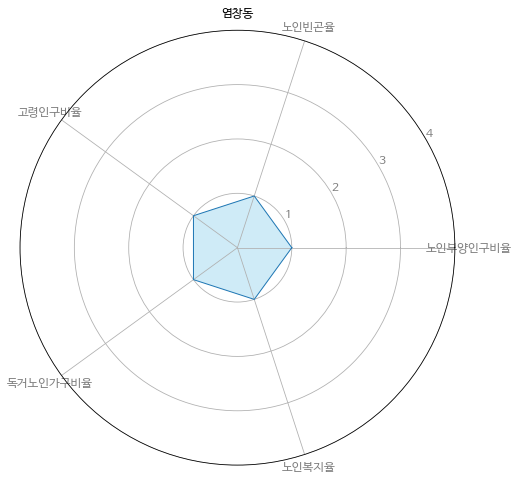

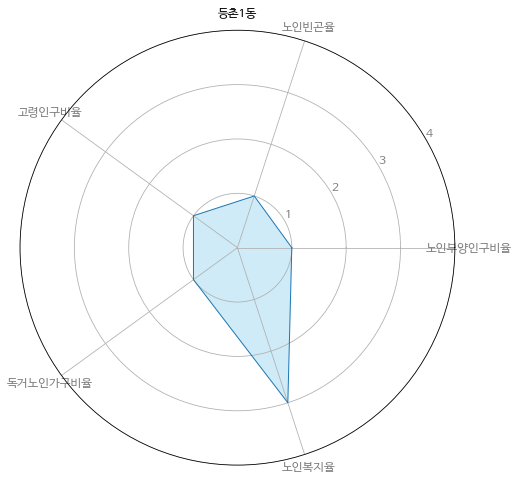

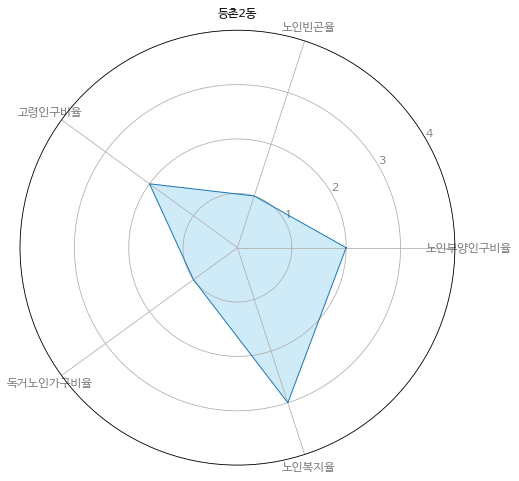

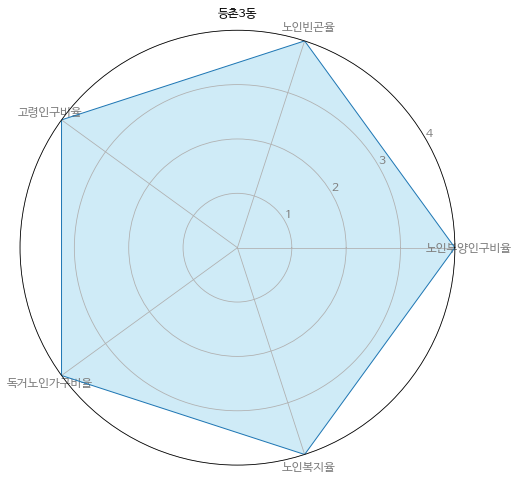

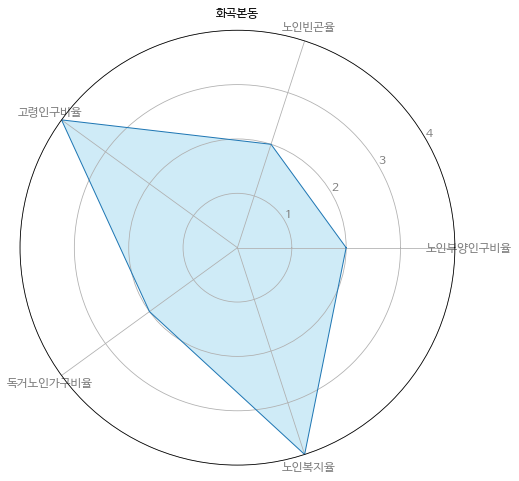

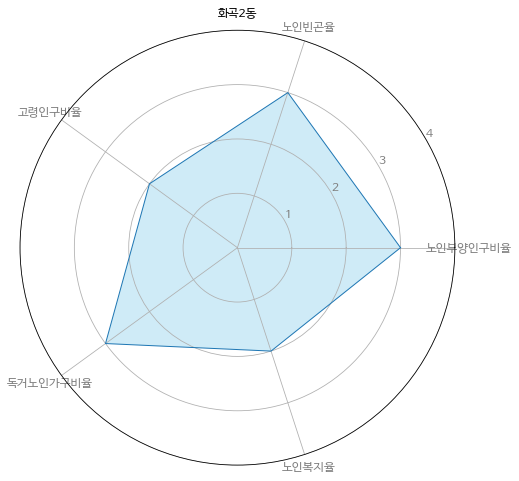

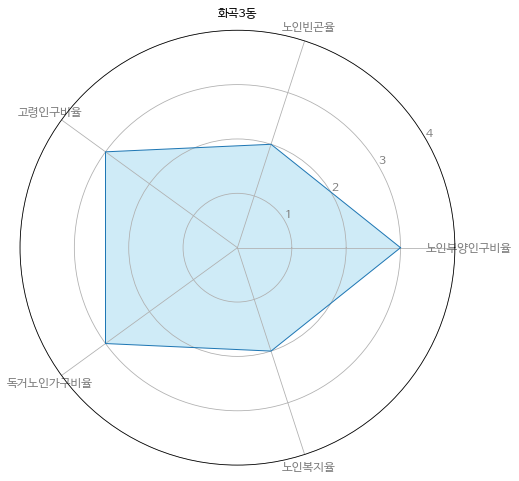

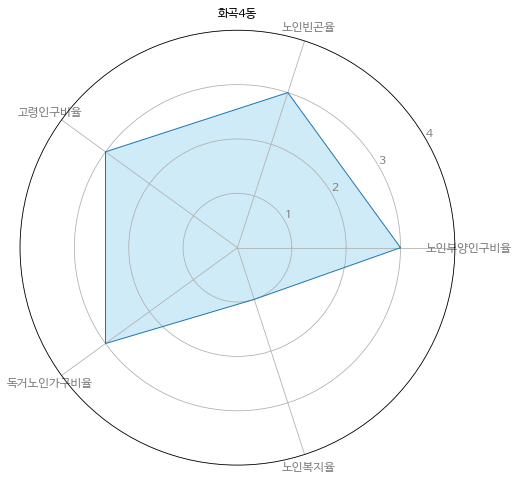

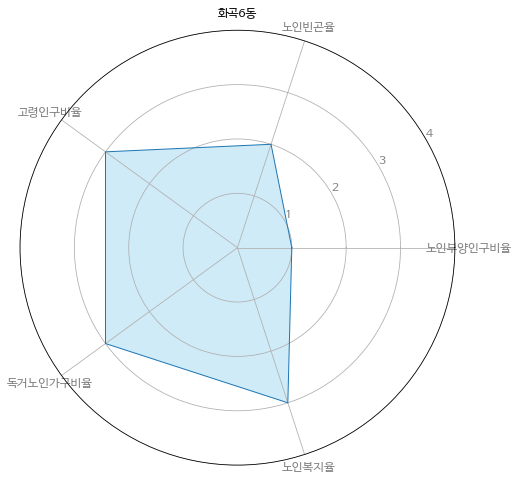

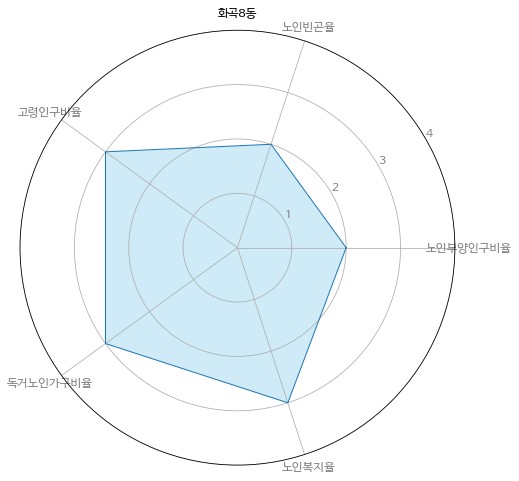

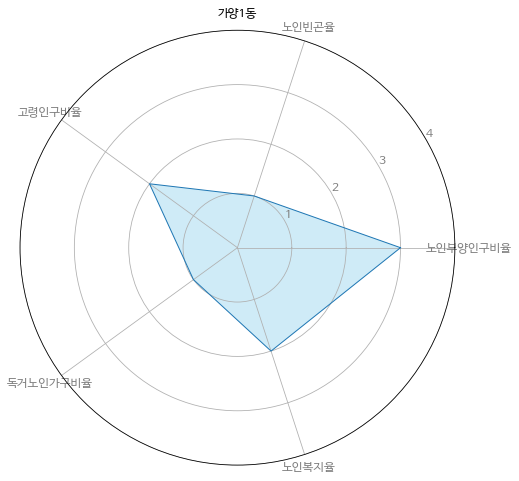

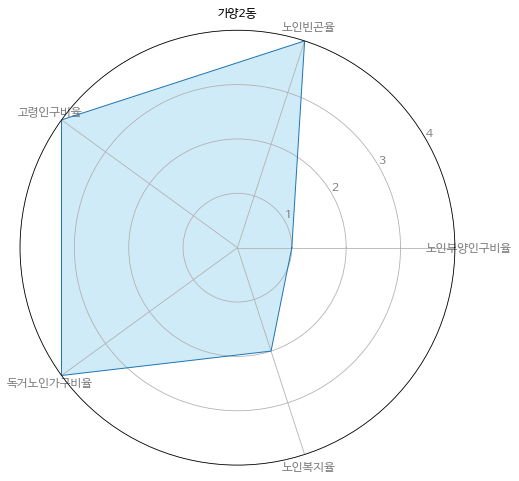

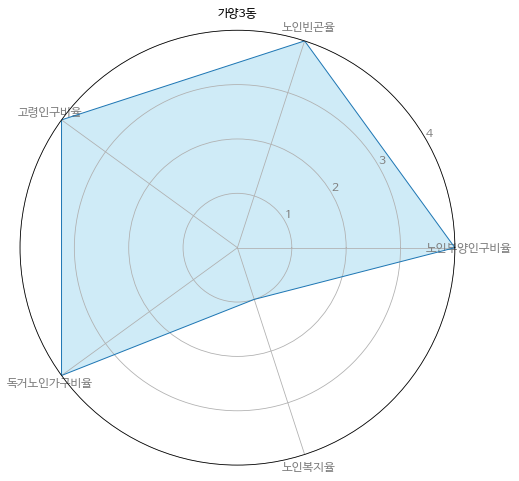

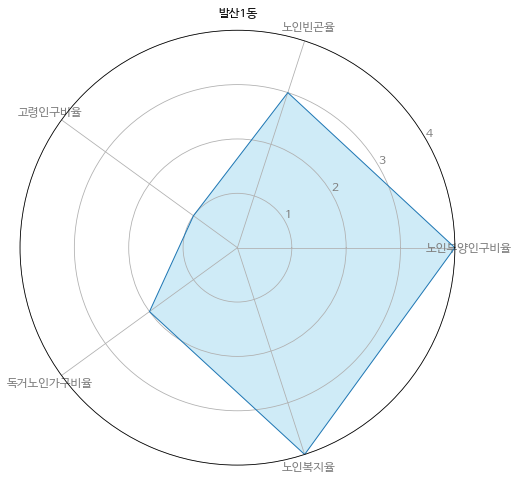

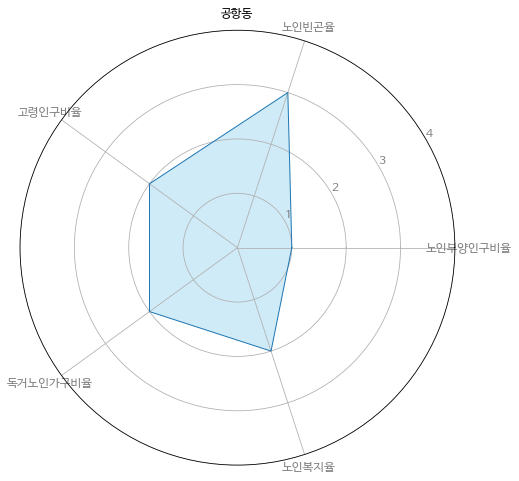

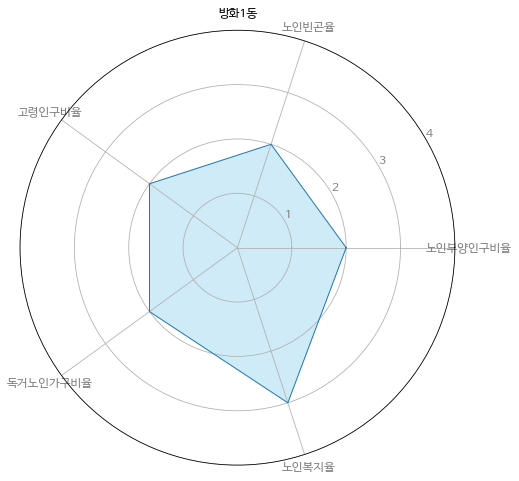

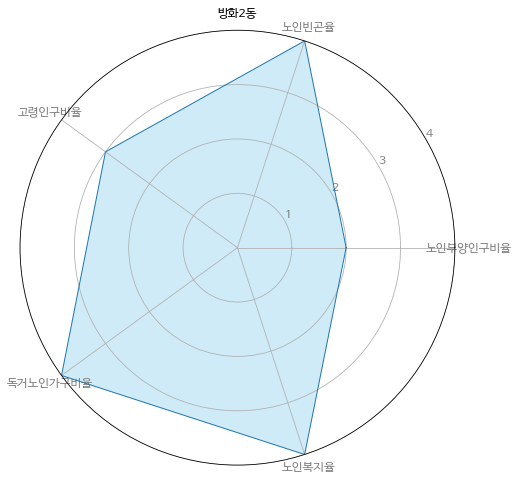

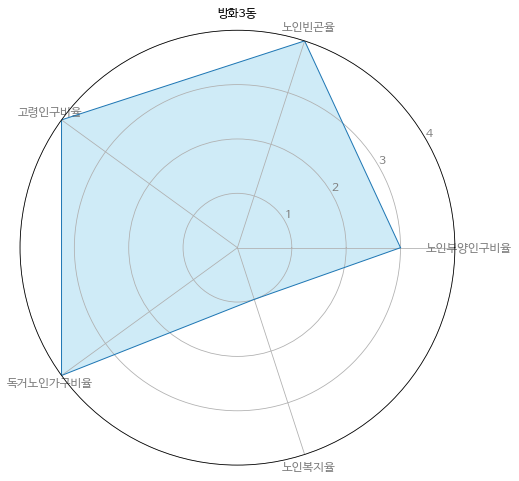

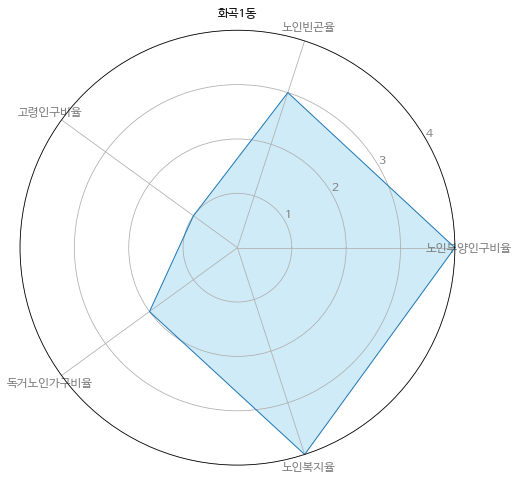

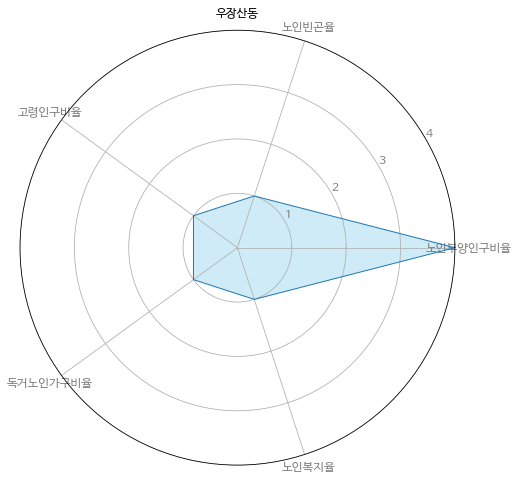

In [ ]:
for i in range(20):
  val_c1 = df_features.loc[i].drop('id').values.flatten().tolist()
  val_c1 += val_c1[:1]
  print(val_c1)

  angles = [n/float(len(categories))*2*np.pi for n in range(len(categories))]
  angles += angles[:1]
  print(angles)


  fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8),subplot_kw=dict(polar=True))

  plt.title(df_features['id'][i])
  plt.xticks(angles[:-1], categories, color='grey',size=12)
  plt.yticks(np.arange(1,5),['1','2','3','4'],color='grey',size=12)
  plt.ylim(0,4)
  ax.set_rlabel_position(30)

  ax.plot(angles,val_c1,linewidth=1,linestyle='solid',label='Client c1')
  ax.fill(angles,val_c1,'skyblue',alpha=0.4)

###**2) 지도 시각화**

In [ ]:
import json
import folium
import pandas as pd

In [ ]:
seoul_geo=json.load(open('/content/HangJeongDong_ver20230101.geojson.txt', encoding='utf-8'))

In [ ]:
dongdata=pd.read_excel('/content/dongdata.xlsx',header=0)
for i in range(len(dongdata)):
  dongdata.loc[i,'dong']=str(dongdata.loc[i,'dong'])
dongdata=dongdata.drop('Unnamed: 2',axis=1)

In [ ]:
gangseo_map=folium.Map(location=[37.5502, 126.982],zoom_start=10.5, tiles='cartodbpositron')
gangseo_map.choropleth(geo_data=seoul_geo, data=dongdata, columns=['dong','counts'], key_on='properties.adm_cd', highlight=True, fill_opacity=0.5, line_opacity=1, fill_color='PuRd')
gangseo_map.save('gangseo_map.html')
gangseo_map